# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *yfinance*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *yfinance*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install conda-forge::yfinance*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado yfinance

**Alternativa**: `!pip install yfinance`

In [8]:
import yfinance as yf
import pandas as pd

Primero importaremos datos desde un archivo con extensión `.csv`

In [11]:
data = pd.read_csv("FB.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...,...
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600


In [15]:
data[data["High"] < 130][["Date", "Adj Close"]]

,Date,Adj Close
0,2015-01-02,78.449997
1,2015-01-05,77.190002
2,2015-01-06,76.150002
3,2015-01-07,76.150002
4,2015-01-08,78.180000
...,...,...
515,2017-01-19,127.550003
516,2017-01-20,127.040001
517,2017-01-23,128.929993
518,2017-01-24,129.369995


Ahora lo haremos desde Yahoo Finance

In [19]:
aapl = yf.download("AAPL", start = "2020-01-01", end = "2021-01-01")
aapl

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750244,132079200
...,...,...,...,...,...,...
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514481,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146637,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360519,121047300


In [21]:
aapl.describe()

#Std = desviacion estandar
#mean = promedio

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,95.267668,96.661769,93.912796,95.347075,93.275342,1.575646e+08
std,22.011907,22.094637,21.579913,21.809814,21.545686,6.983072e+07
min,57.020000,57.125000,53.152500,56.092499,54.707001,4.669130e+07
25%,77.025002,78.167503,76.220001,77.385002,75.316765,1.108432e+08
50%,91.279999,92.970001,90.910004,91.632500,89.611069,1.380234e+08
75%,115.982498,117.279999,114.129997,115.750000,113.400627,1.875728e+08
max,138.050003,138.789993,134.339996,136.690002,134.146637,4.265100e+08


<Axes: xlabel='Date'>

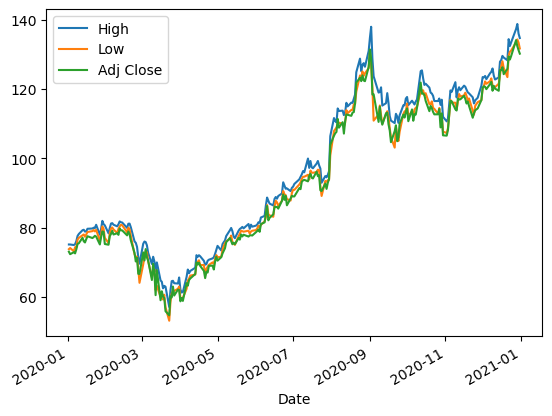

In [23]:
aapl[["High","Low", "Adj Close"]].plot()

#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

¿Cómo lucen estos datos?

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [34]:
def getclose(names, start, end):
    return yf.download(names, start=start, end=end)[["Adj Close"]]

getclose("AAPL","2020-01-01","2020-12-31")

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2020-01-02,73.059425
2020-01-03,72.349129
2020-01-06,72.925636
2020-01-07,72.582657
2020-01-08,73.750237
...,...
2020-12-23,128.523300
2020-12-24,129.514450
2020-12-28,134.146637


In [33]:
lista = list(aapl["Adj Close"])
rendimientos = []
for i in range(len(lista) - 1):
    r = (lista[i +1] - lista[i])/ lista[i]
    rendimientos.append(r)
rendimientos

[-0.009721968696050269,
 0.007968304364487576,
 -0.0047032439892037555,
 0.01608641902767557,
 0.021240888205481312,
 0.0022605533939247273,
 0.021364158017269652,
 -0.013503084472724426,
 -0.004285516532987734,
 0.012526549052797091,
 0.011070980454155752,
 -0.00677687864843846,
 0.003569338759832624,
 0.004816169313071935,
 -0.0028820015256441445,
 -0.029405351227053258,
 0.028289367221380844,
 0.020932194479259585,
 -0.001449001369801415,
 -0.04433876228690662,
 -0.0027462249034565143,
 0.03301384657156514,
 0.0081540399695806,
 0.011697106405117334,
 -0.013592698377947767,
 0.004749838111476882,
 -0.006033690929719139,
 0.023747899144855155,
 -0.007121161885961762,
 0.0002463785815913783,
 -0.01831062516020774,
 0.014482776953228799,
 -0.01025907986194371,
 -0.022634741466289136,
 -0.04750052650533297,
 -0.033872257296639535,
 0.015863662718138802,
 -0.06536836625274292,
 -0.000584808768562273,
 0.09310070148292045,
 -0.031759179538646515,
 0.046384552124165125,
 -0.032437009775143

(array([  1.,   3.,   4.,  21.,  62., 103.,  46.,   6.,   3.,   3.]),
 array([-0.12864705, -0.10380152, -0.07895599, -0.05411046, -0.02926493,
        -0.0044194 ,  0.02042613,  0.04527166,  0.07011719,  0.09496273,
         0.11980826]),
 <BarContainer object of 10 artists>)

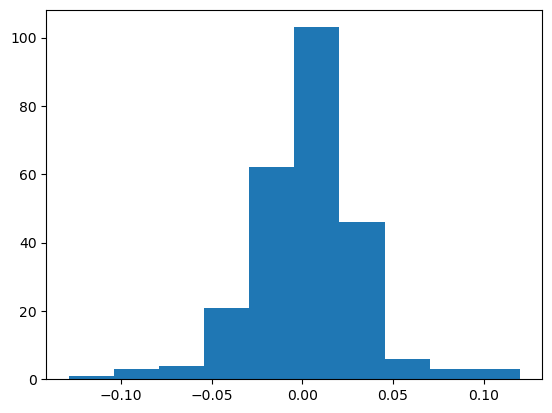

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(rendimientos)

y la gráfica de los rendimientos se puede obtener como...

In [37]:
R_aapl = aapl["Adj Close"]
R_aapl = aapl["Adj Close"].pct_change()
R_aapl = R_aapl.dropna()
R_aapl

Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
2020-12-31   -0.007703
Name: Adj Close, Length: 252, dtype: float64

In [38]:
R_aapl.mean(), R_aapl.std()

(0.0027275170404923543, 0.02941782279319025)

In [39]:
R_aapl.describe()

count    252.000000
mean       0.002728
std        0.029418
min       -0.128647
25%       -0.010434
50%        0.001655
75%        0.017074
max        0.119808
Name: Adj Close, dtype: float64

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.


Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [42]:
import numpy as np
r_aapl = np.log(aapl["Adj Close"]/aapl["Adj Close"].shift()).dropna()
r_aapl.describe()

count    252.000000
mean       0.002293
std        0.029434
min       -0.137708
25%       -0.010489
50%        0.001653
75%        0.016930
max        0.113157
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

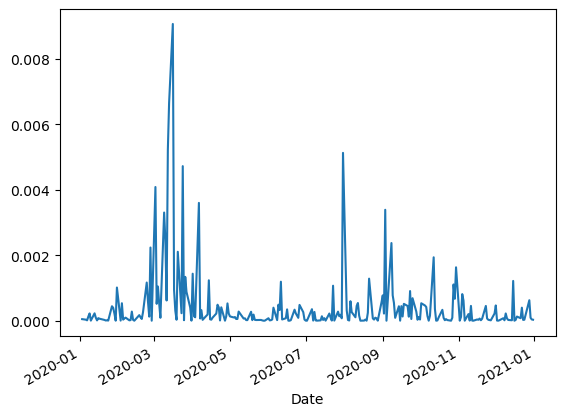

In [44]:
#Diferencias entre los diferentes metodos de rendimiento
(R_aapl - r_aapl).plot()

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [45]:
mean = R_aapl.mean()
std = R_aapl.std()
mean, std

(0.0027275170404923543, 0.02941782279319025)

In [50]:
sim_aapl = pd.DataFrame(np.random.normal(mean, std, (5, 10000)))
sim_aapl
                

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.016876,0.024716,-0.002373,0.061070,-0.026116,-0.033241,0.018618,-0.002096,0.004043,0.015583,...,0.024848,0.004182,0.008240,-0.005451,-0.018692,-0.023650,0.049234,-0.012062,0.020019,0.011064
1,0.038464,0.042239,-0.008938,-0.038723,0.045743,0.041952,-0.021570,0.010443,0.003946,-0.013324,...,0.030704,0.009480,-0.000534,0.012889,-0.034154,-0.040835,0.005578,0.014360,-0.042095,-0.005808
2,-0.002068,0.012220,-0.020504,-0.002380,0.027808,0.035567,-0.034171,0.029265,0.015011,-0.023832,...,-0.028264,-0.014033,-0.040157,-0.003465,-0.051219,0.056519,-0.061473,0.001495,-0.010658,-0.018890
3,0.046927,-0.055342,0.030818,-0.057207,-0.028581,0.022966,-0.023583,0.014012,-0.021030,0.025062,...,0.040527,0.033933,0.002817,0.016126,-0.004042,-0.028483,0.032877,-0.015605,0.031323,0.027850
4,0.065617,-0.002893,0.017854,-0.013742,0.016589,0.012560,0.062443,0.009828,0.012679,0.018777,...,-0.030986,-0.043322,0.023774,0.031451,-0.048618,0.012542,-0.039606,-0.020550,0.040070,-0.021003


___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.